In [1]:
import duckdb as duck
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
db_path = r'processed_data/imob.duckdb'

In [56]:
conn = duck.connect(db_path)

tables_index = conn.sql("SELECT table_schema, table_name FROM information_schema.tables WHERE table_schema = 'index' ORDER BY table_schema, table_name ").df()
tables_imob_info = conn.sql("SELECT table_schema, table_name FROM information_schema.tables WHERE table_schema = 'imob_info' ORDER BY table_schema, table_name ").df()
tables_index = conn.sql("SELECT table_schema, table_name FROM information_schema.tables WHERE table_schema = 'index' ORDER BY table_schema, table_name ").df()
tables_imob_targeting= conn.sql("SELECT table_schema, table_name FROM information_schema.tables WHERE table_schema = 'imob_targeting' ORDER BY table_schema, table_name ").df()

ivg = conn.sql("SELECT * FROM index.ivg").df()
pib = conn.sql("SELECT * FROM index.pib").df()
median_ivg = conn.sql("SELECT * FROM index.median_ivg").df()
selic = conn.sql("SELECT * FROM index.meta_selic").df() 
dollar = conn.sql("SELECT * FROM index.dollar").df() 
divida = conn.sql("SELECT * FROM index.divida").df() 

index = conn.sql(""" 
    SELECT i.date, i.month, i.year, i.ivg, p.pib, s.selic, mi.median_ivg
    FROM index.ivg i
    INNER JOIN index.pib p
        ON i.year = p.year AND i.month = p.month
    INNER JOIN index.meta_selic s
        ON i.year = s.year AND i.month = s.month
    INNER JOIN index.median_ivg mi
        ON i.year = mi.year AND i.month = mi.month             
""").df()


In [59]:
acquisition = conn.sql("SELECT * FROM imob_targeting.acquisition_pivot").df() 
application = conn.sql("SELECT * FROM imob_targeting.application_pivot").df() 
construction = conn.sql("SELECT * FROM imob_targeting.construction_pivot").df() 
reform = conn.sql("SELECT * FROM imob_targeting.reform_pvt").df() 

In [33]:
dormitories = conn.sql("SELECT * FROM imob_info.dormitories_pivot").df() 
imob_val = conn.sql("SELECT * FROM imob_info.imob_val_pivot").df() 
imob_type = conn.sql("SELECT * FROM imob_info.imob_type_pivot").df() 
implantation_type = conn.sql("SELECT * FROM imob_info.implantation_type_pivot").df() 
guarantee = conn.sql("SELECT * FROM imob_info.guarantee_pivot").df() 
area = conn.sql("SELECT * FROM imob_info.area_pivot").df() 

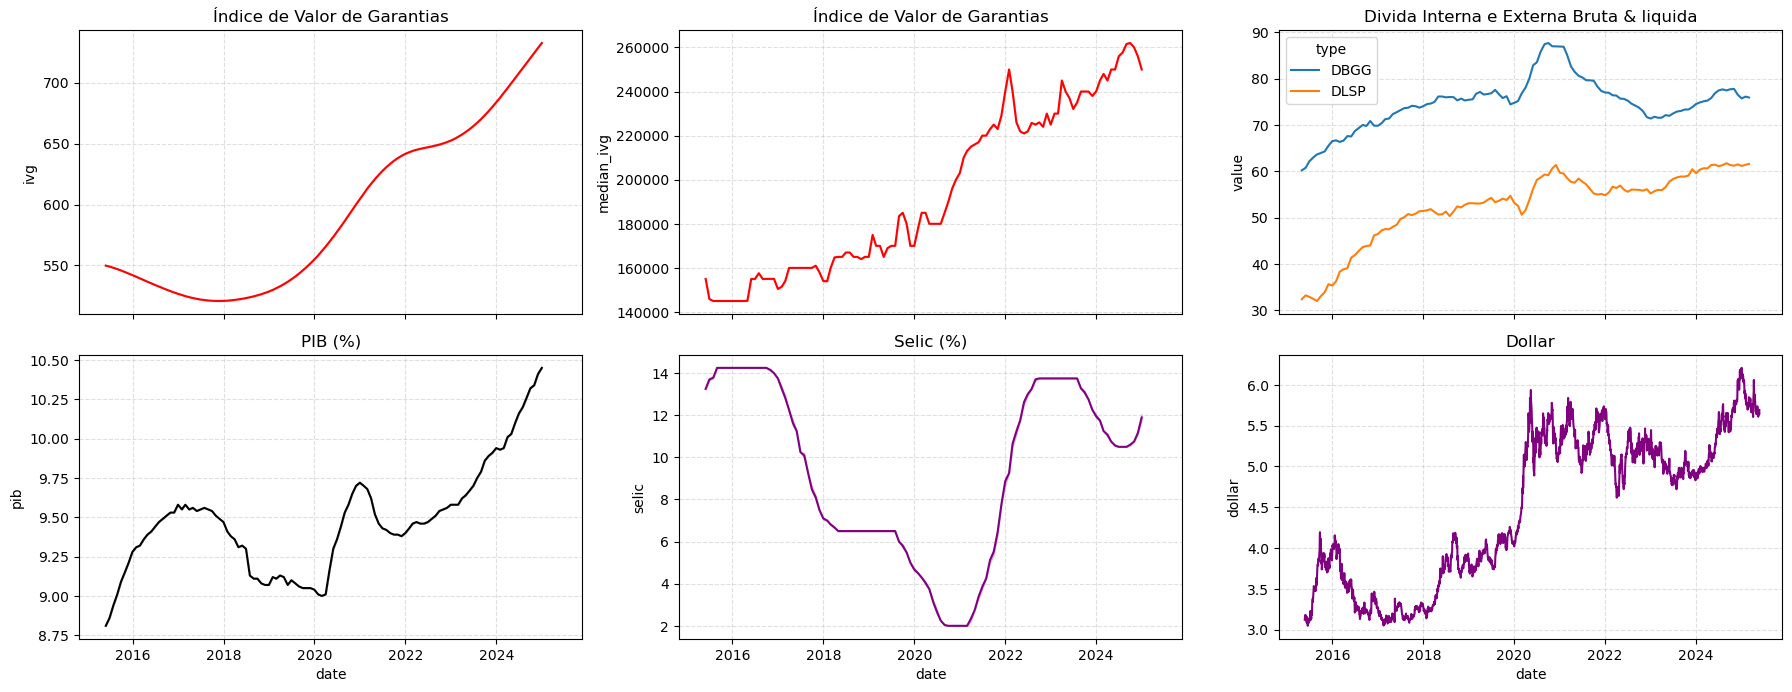

In [54]:
fig, ax = plt.subplots(2,3 , figsize=(18,7), sharex=True)

for row in ax:
    for axis in row:
        axis.grid(True, which='major', linestyle='--', alpha=0.4)
        
sns.lineplot(index, x='date', y='ivg', ax=ax[0,0], color='red')
ax[0,0].set_title("Índice de Valor de Garantias")

sns.lineplot(index, x='date', y='median_ivg', ax=ax[0,1], color='red')
ax[0,1].set_title("Índice de Valor de Garantias")

sns.lineplot(divida, x='date', y='value', hue='type', ax=ax[0,2])
ax[0,2].set_title("Divida Interna e Externa Bruta & liquida")

sns.lineplot(index, x='date', y='pib', ax=ax[1,0], color='black')
ax[1,0].set_title("PIB (%)")

sns.lineplot(index, x='date', y='selic', ax=ax[1,1], color='purple')
ax[1,1].set_title("Selic (%)")

sns.lineplot(dollar, x='date', y='dollar', ax=ax[1,2], color='purple')
ax[1,2].set_title("Dollar")

plt.tight_layout(pad=1.0)
plt.show()

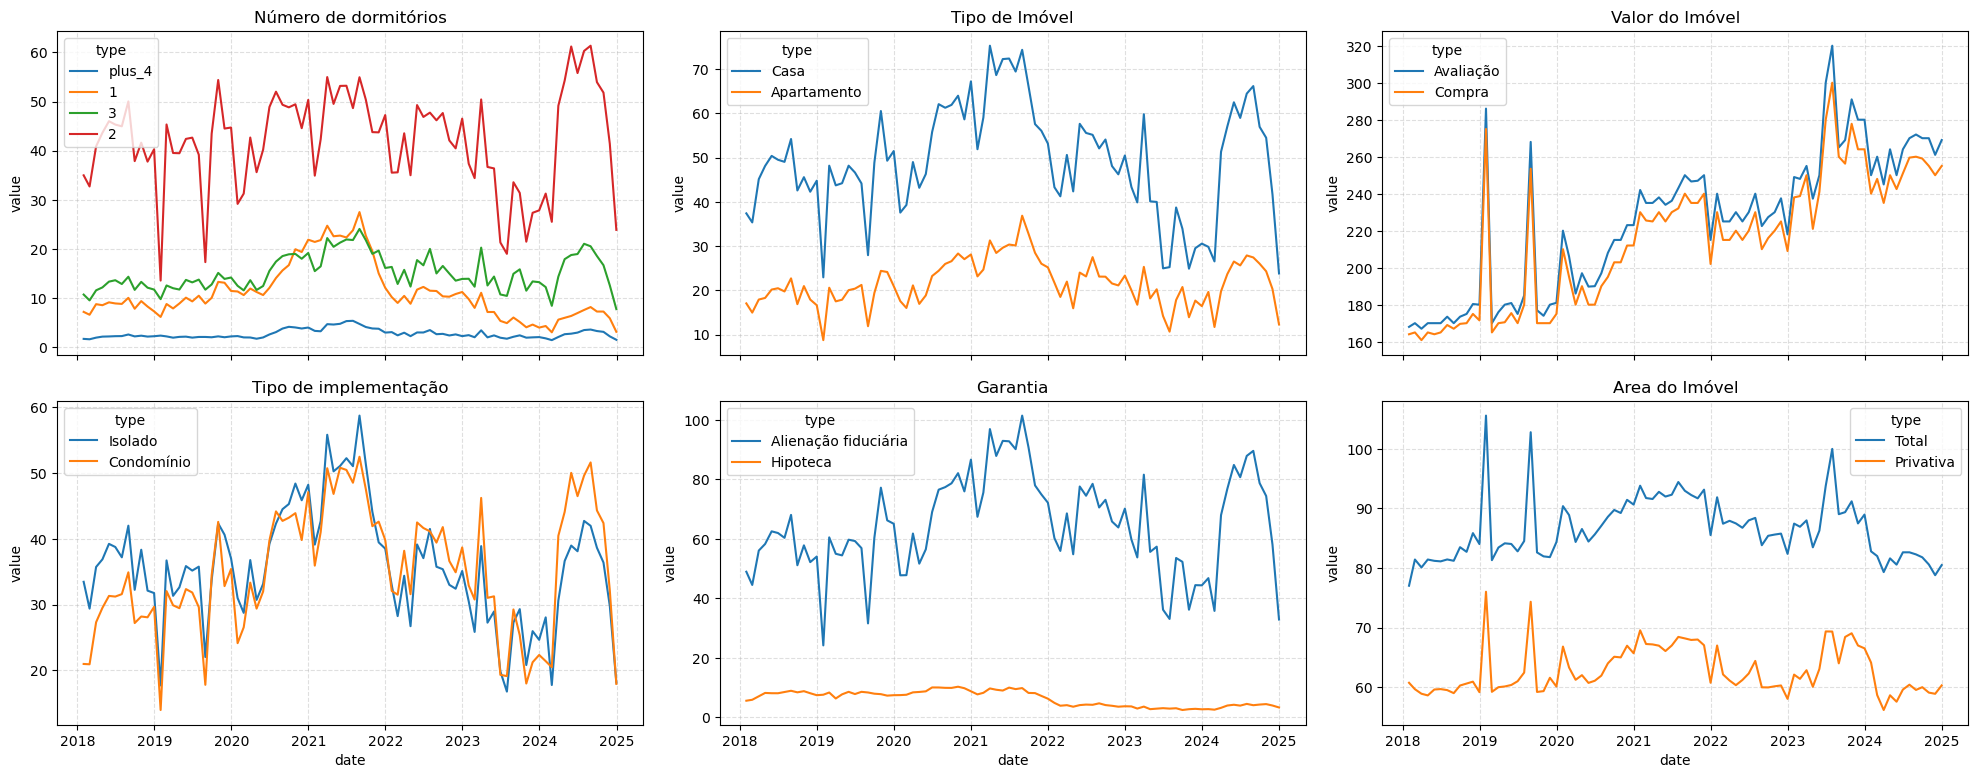

In [53]:

fig, ax = plt.subplots(2,3 , figsize=(20,8), sharex=True)

for row in ax:
    for axis in row:
        axis.grid(True, which='major', linestyle='--', alpha=0.4)
        legend = axis.get_legend()
        if legend:
            axis.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

sns.lineplot(dormitories, x='date', y='value',hue='type', ax=ax[0,0])
ax[0,0].set_title( "Número de dormitórios")

sns.lineplot(imob_type, x='date', y='value', hue='type', ax=ax[0,1])
ax[0,1].set_title( "Tipo de Imóvel")

sns.lineplot(imob_val, x='date', y='value', hue='type', ax=ax[0,2])
ax[0,2].set_title( "Valor do Imóvel")

sns.lineplot(implantation_type, x='date', y='value', hue='type', ax=ax[1,0])
ax[1,0].set_title( "Tipo de implementação")

sns.lineplot(guarantee, x='date', y='value', hue='type', ax=ax[1,1])
ax[1,1].set_title( "Garantia")

sns.lineplot(area, x='date', y='value', hue='type', ax=ax[1,2])
ax[1,2].set_title( "Area do Imóvel")



#plt.tight_layout(rect=[0, 0, 0.9, 1])

plt.tight_layout(pad=1.5)
plt.show()

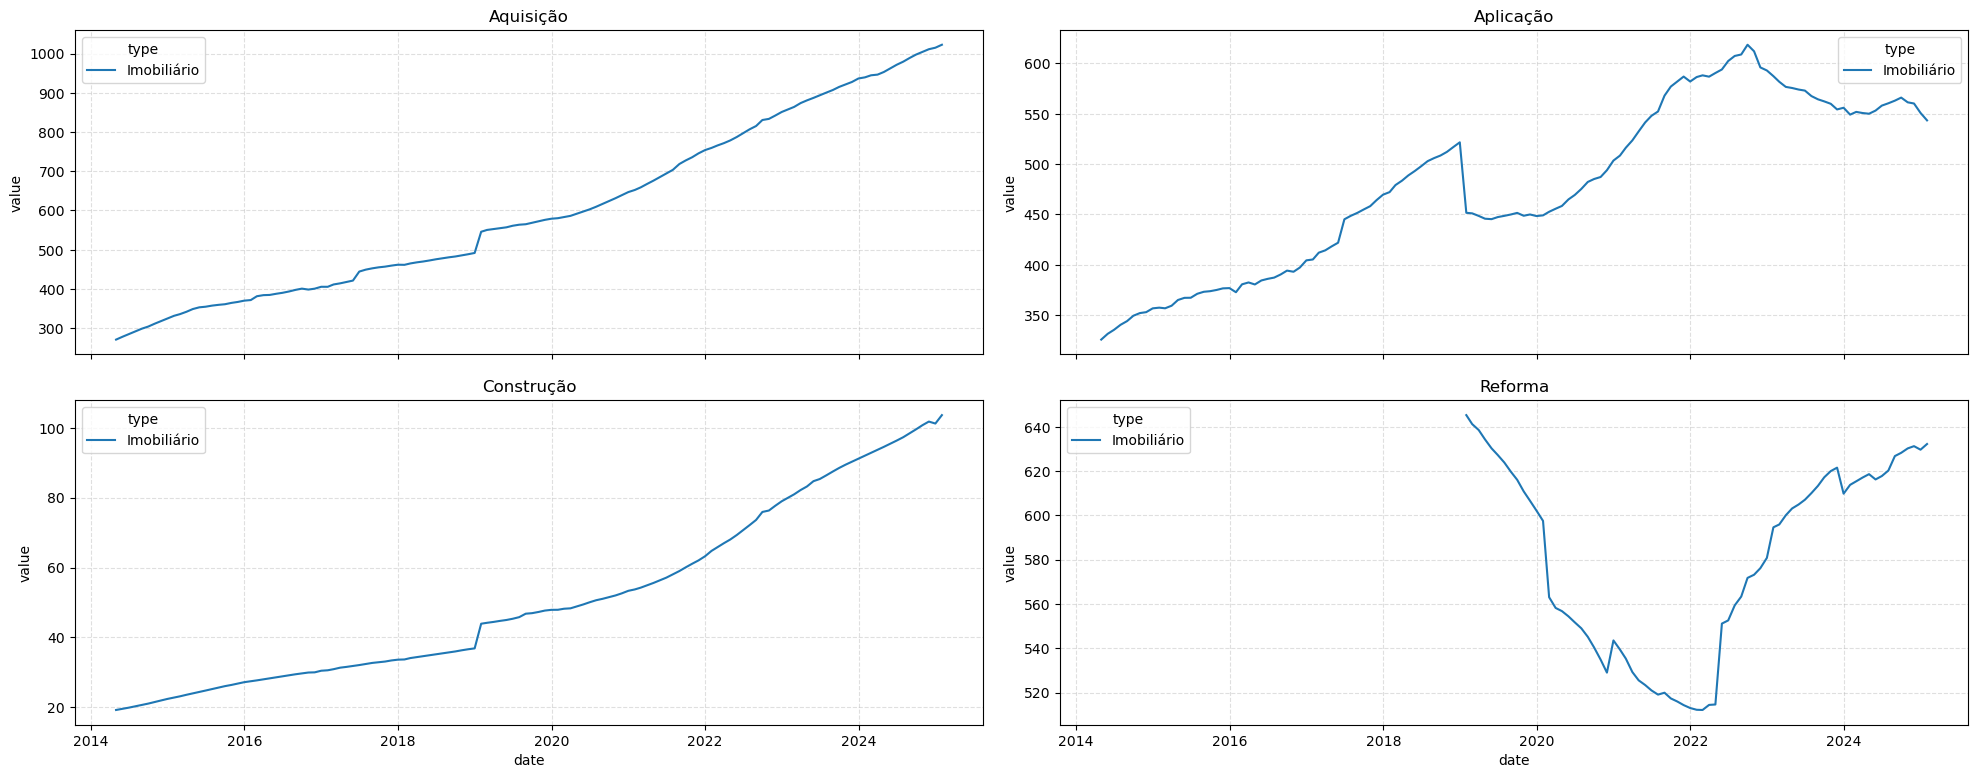

In [65]:
acquisition = conn.sql("SELECT * FROM imob_targeting.acquisition_pivot").df() 
application = conn.sql("SELECT * FROM imob_targeting.application_pivot").df() 
construction = conn.sql("SELECT * FROM imob_targeting.construction_pivot").df() 
reform = conn.sql("SELECT * FROM imob_targeting.reform_pvt").df() 


fig, ax = plt.subplots(2,2 , figsize=(20,8), sharex=True)

for row in ax:
    for axis in row:
        axis.grid(True, which='major', linestyle='--', alpha=0.4)
        legend = axis.get_legend()
        if legend:
            axis.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

sns.lineplot(acquisition, x='date', y='value',hue='type', ax=ax[0,0])
ax[0,0].set_title( "Aquisição")

sns.lineplot(application, x='date', y='value', hue='type', ax=ax[0,1])
ax[0,1].set_title( "Aplicação")

sns.lineplot(construction, x='date', y='value', hue='type', ax=ax[1,0])
ax[1,0].set_title( "Construção")

sns.lineplot(reform, x='date', y='value', hue='type', ax=ax[1,1])
ax[1,1].set_title( "Reforma")



#plt.tight_layout(rect=[0, 0, 0.9, 1])

plt.tight_layout(pad=1.5)
plt.show()